In [556]:
#Importing libraries
import pandas as pd
import sklearn.datasets as datasets
import numpy as np
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer
import xgboost
import matplotlib.pyplot as plt
from xgboost import plot_tree
from sklearn.metrics import mean_absolute_error
training_set = pd.read_csv('train.csv')
testing_set = pd.read_csv('test.csv')
training_set.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [557]:
#

training_data_lot = training_set.SalePrice

#exclude Id columns from train and test data
training_set = training_set.drop(['Id', 'SalePrice'], axis = 1)
#training_set = training_set.reshape(training_set.shape[1:])
print(training_set.shape)

testing_set = testing_set.drop(['Id'], axis = 1)
print(testing_set.shape)

#testing and training sets don't have the same shape
#X = X.reshape(X.shape[1:])
training_set.drop(training_set.index[2], inplace = True)

print(training_set.shape)
print(testing_set.shape)

(1460, 79)
(1459, 79)
(1459, 79)
(1459, 79)


In [558]:
train_numeric = training_set.select_dtypes(exclude=['object'])
train_numeric_columns = train_numeric.columns


In [559]:
my_imputer = Imputer()
train_numeric = my_imputer.fit_transform(train_numeric)
train_numeric = pd.DataFrame(train_numeric, columns = train_numeric_columns)

C:\Users\sheel\Anaconda3\envs\fund\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [560]:
#difference function
def df_func(first, second):
        second = set(second)
        return [item for item in first if item not in second]


train_non_numeric = training_set[df_diff(training_set.columns, train_numeric.columns)]
train_non_numeric = pd.get_dummies(train_non_numeric)

In [561]:
training_preprocessed = pd.concat([train_numeric.reset_index(drop=True), train_non_numeric], axis=1)

In [562]:
test_numeric = testing_set.select_dtypes(exclude=['object'])
test_numeric_columns = test_numeric.columns
my_imputer = Imputer()
test_numeric = my_imputer.fit_transform(test_numeric)
test_numeric = pd.DataFrame(test_numeric, columns = test_numeric_columns)

C:\Users\sheel\Anaconda3\envs\fund\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [563]:
test_non_numeric = testing_set[df_diff(testing_set.columns, test_numeric.columns)]
test_non_numeric = pd.get_dummies(test_non_numeric)

In [564]:
testing_preprocessed = pd.concat([test_numeric.reset_index(drop=True), test_non_numeric], axis=1)

In [565]:
similar_c = testing_preprocessed.columns.intersection(training_preprocessed.columns)
testing_preprocessed = testing_preprocessed[similar_c]
training_preprocessed = training_preprocessed[similar_c]

In [566]:
boosting_model = XGBRegressor()

boosting_model.fit(training_preprocessed, training_data_lot)

C:\Users\sheel\Anaconda3\envs\fund\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\sheel\Anaconda3\envs\fund\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[17:27:08] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [567]:
price_predictions = boosting_model.predict(testing_preprocessed)

In [568]:
print(price_predictions)

[121629.72 159528.33 183604.64 ... 131202.61 134026.72 191350.34]


In [569]:
#print("The Mean Squared Error is: " + str(mean_absolute_error(price_predictions, testing_set)))

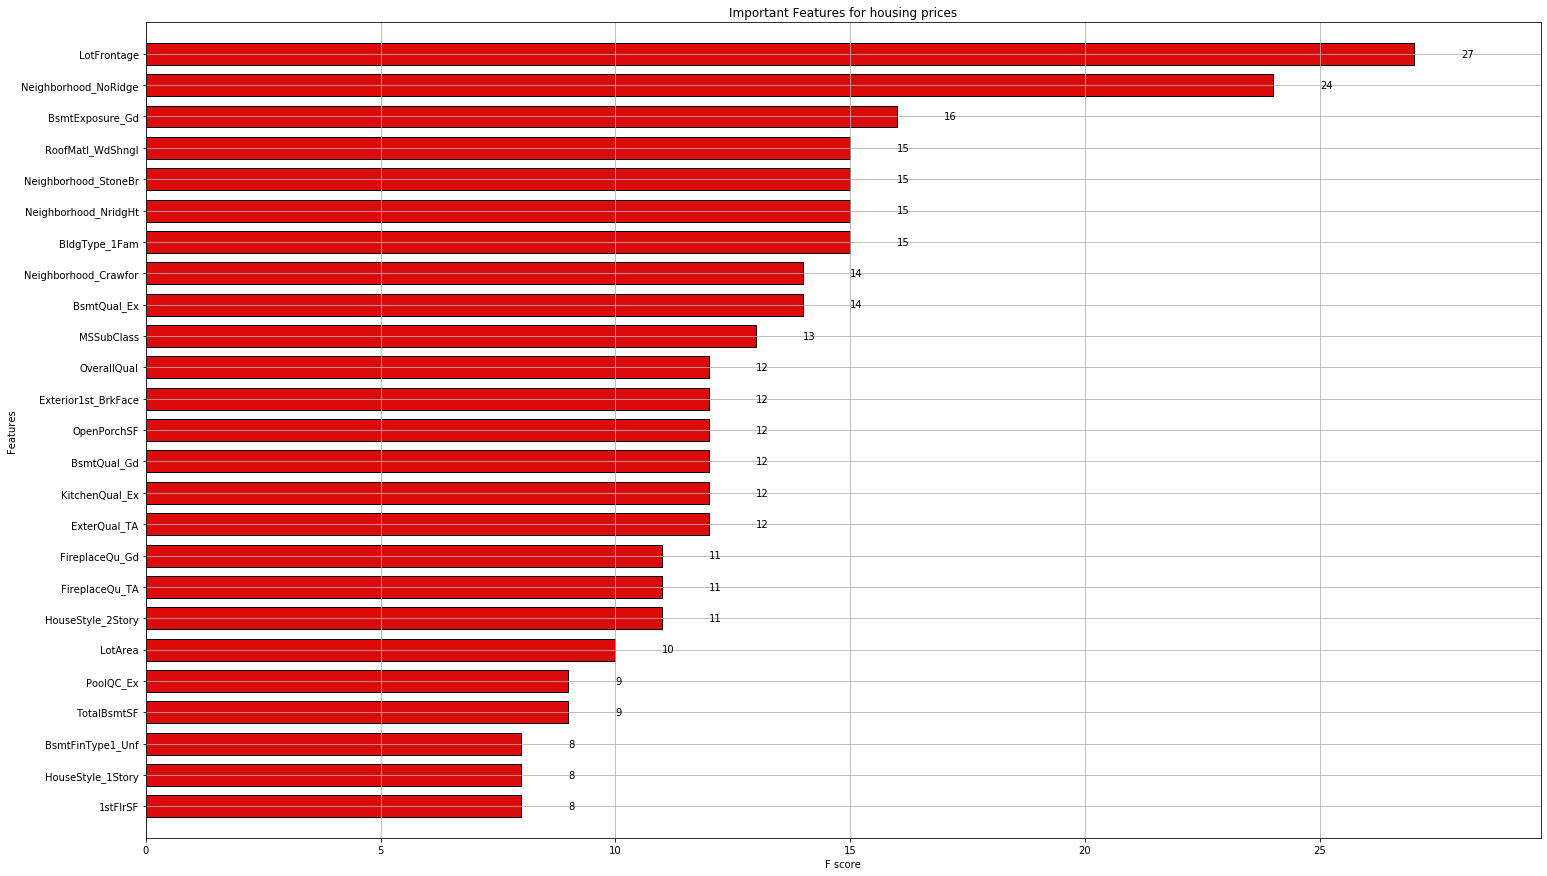

In [570]:
# Significance of certain features 

plt.rcParams["figure.figsize"] = (25,15)

xgboost.plot_importance(boosting_model, max_num_features = 25, height=0.7, facecolor='#db0b0b', edgecolor='black', title='Important Features for housing prices', importance_type="weight")

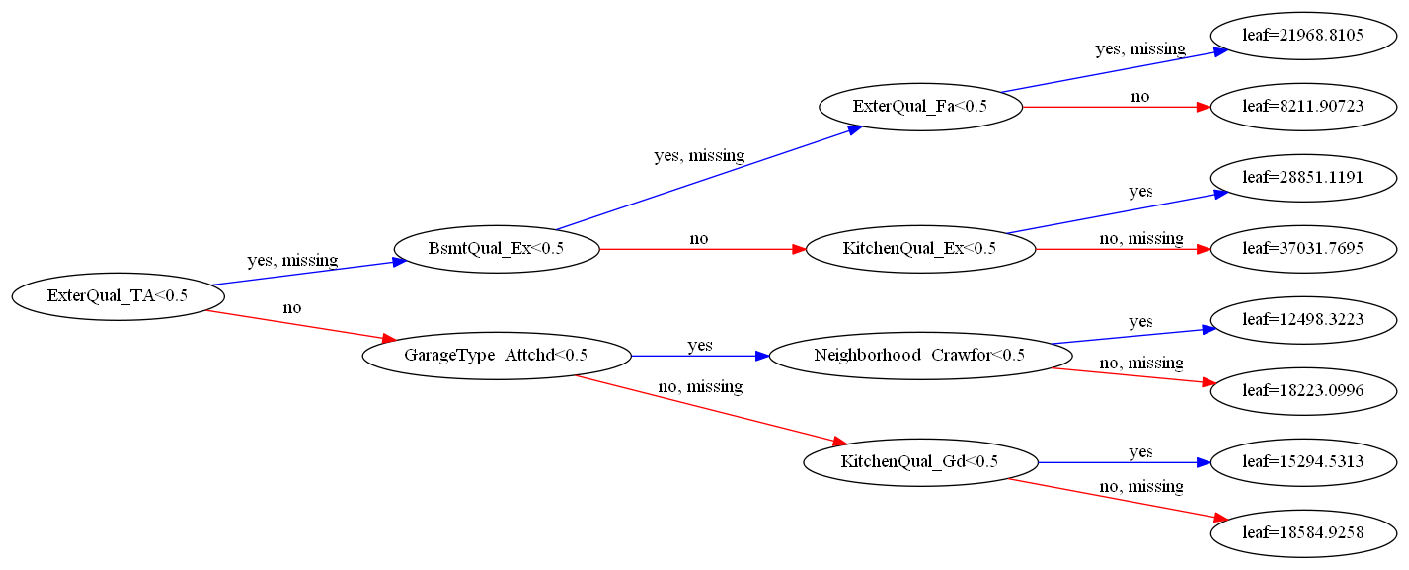

In [571]:
#features and feature values for each split as well as the output leaf nodes.
plot_tree(boosting_model, num_trees=0, rankdir='LR')


#testing_set = pd.read_csv('test.csv')
#my_submission_grid = pd.DataFrame({'Id': test_data.Id, 'SalePrice': predictions_prices})

In [572]:
test_predictions = pd.read_csv('test.csv')
prediction_model = pd.DataFrame({'Id': test_predictions.Id, 'SalePrice': price_predictions})

In [573]:
prediction_model

,Id,SalePrice
0,1461,121629.718750
1,1462,159528.328125
2,1463,183604.640625
3,1464,188104.562500
4,1465,187390.250000
...,...,...
1454,2915,89545.109375
1455,2916,91921.187500
1456,2917,131202.609375
1457,2918,134026.718750


NameError: name 'GradientBoostingRegressor' is not defined